# **LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **DATA**

In [2]:
# Mount Google Drive to the Colab environment.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define the path to the dataset file in Google Drive.
path = "/content/drive/MyDrive/ProgettoDataMining/selected_df.npy"
# Load the dataset from the pickle file.
df = pd.read_pickle(path)

In [4]:
# Reset the index of the DataFrame to ensure a clean index.
df = df.reset_index(drop = True)
# Convert column names to strings for consistency.
df.columns = df.columns.astype(str)

In [5]:
# Randomly sample 500 entries from the dataset without replacement.
df_new= df.sample(n = 500, replace=False,random_state=46)

In [6]:
# Verify the distribution of the labels in the new subset.
df_new["Label"].value_counts()

Label
notumor            142
pituitary tumor    131
glioma             115
meningioma         112
Name: count, dtype: int64

In [7]:
# Display the new sampled DataFrame.
df_new

,25,40,45,62,68,79,87,89,Label
1690,2.317549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,meningioma
2779,0.000000,0.642771,3.901298,0.000000,0.000000,2.058640,0.000000,4.388488,pituitary tumor
1356,9.445905,0.000000,0.000000,0.000000,4.319863,1.046326,0.000000,0.000000,glioma
1629,0.398791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,meningioma
1885,1.976680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,meningioma
...,...,...,...,...,...,...,...,...,...
2150,0.000000,0.000000,0.000000,1.930547,0.000000,0.000000,0.000000,0.000000,pituitary tumor
414,0.000000,0.394370,0.226037,0.454455,0.218589,0.223947,0.000000,0.060145,notumor
1027,0.000000,0.000000,0.000000,0.000000,0.000000,0.476463,0.000000,0.000000,glioma
115,0.404602,0.000000,0.000000,0.279820,0.000000,0.000000,0.764289,0.000000,notumor


# **VISUALIZATION**

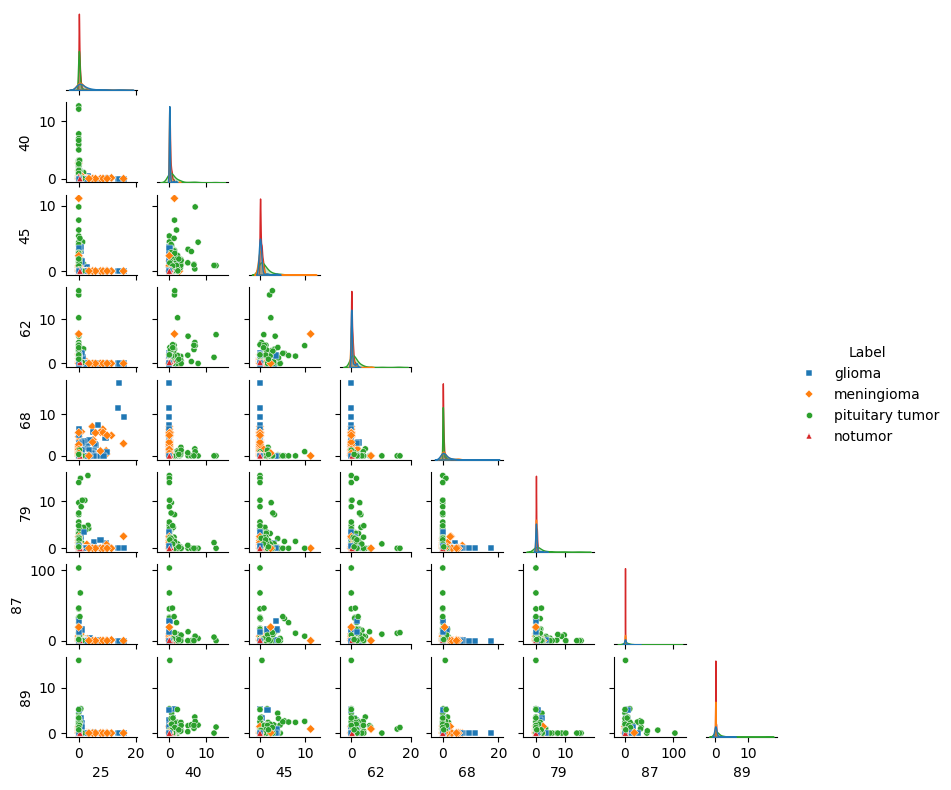

In [8]:
# Define a dictionary to map each tumor label to a specific marker shape.
markers = {
    "glioma": "s",            # Square marker for glioma
    "meningioma": "D",        # Diamond marker for meningioma
    "pituitary tumor": "o",   # Circle marker for pituitary tumor
    "notumor": "^"            # Triangle marker for no tumor
    }

# Set the size of the markers in the pairplot.
value = 20

# Define the order of the hue categories for the plot.
hue_order = ["glioma", "meningioma", "pituitary tumor", "notumor"]

# Create a pairplot using seaborn to visualize relationships between features.
sns.pairplot(
    df_new,                   # DataFrame to plot
    hue="Label",              # Column to use for color coding
    height=1,                 # Height of each facet
    aspect = 1,               # Aspect ratio of each facet
    hue_order=hue_order,      # Order of hue categories
    markers=markers,          # Marker shapes for each category
    plot_kws={"s": value},    # Keyword arguments for the plot (marker size)
    corner=True               # Plot only the lower triangle of the pairplot
    )

## **Zoom**

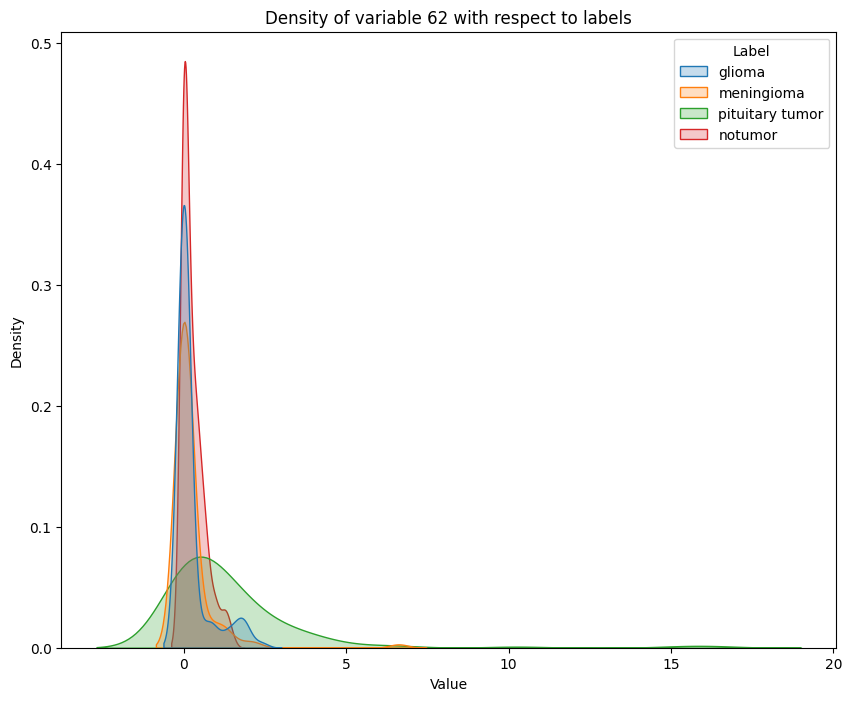

In [9]:
# Create a figure with a specific size for better visualization
plt.figure(figsize=(10, 8))

# Create a KDE plot for variable '62' with respect to 'Label'.
sns.kdeplot(data=df_new, x='62', hue='Label', hue_order = hue_order, fill=True)

# Add title and axis labels.
plt.title('Density of variable 62 with respect to labels')
plt.xlabel('Value')
plt.ylabel('Density')

# Display the plot.
plt.show()

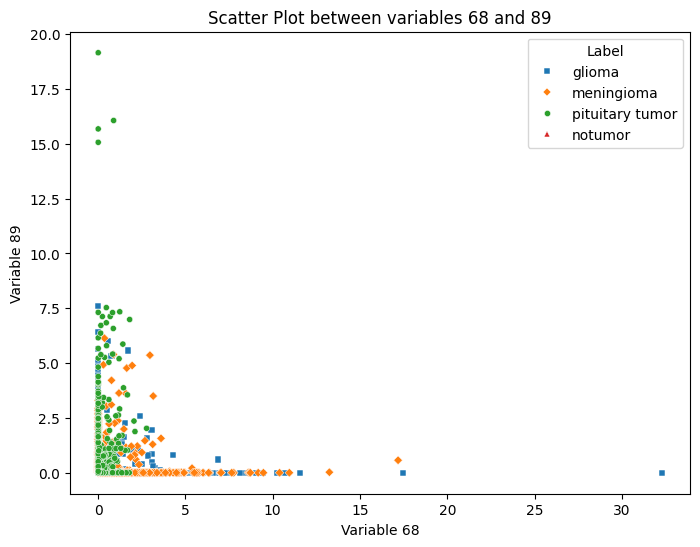

In [10]:
# Create a figure with a specific size for better visualization.
plt.figure(figsize=(8, 6))

# Set the size of the markers.
value = 20

# Create a scatter plot with seaborn.
sns.scatterplot(
    data=df,
    x='68',
    y='89',
    hue='Label',
    hue_order = hue_order,
    style='Label',
    markers=markers,
    s=value
    )

# Add title and axis labels.
plt.title('Scatter Plot between variables 68 and 89')
plt.xlabel('Variable 68')
plt.ylabel('Variable 89')

# Add legend with title.
plt.legend(title='Label')

# Display the plot
plt.show()